# WeatherPy
This is an analysis on the weather conditions of randomly selected cities using APIs, JSON, Matplotlips, Pandas and CSV files to prove the question, What is the weather like as we approach the equator?.
The conclusion breaks down the longitude to Northern and Southern Hemispheres while comparing Latitude with Temperature, Humidity, Cloudiness and Wind Speed.

There is a moderate negative realationship between temperature and latitude for the entire sample cities. However, when split into northern and southern hemispheres, there is a strong negative relationship between temperature and latitude in the northern hem and a moderate positive relationship in the southern hem.
The plots shows no strong relationship between latitude and cloudiness and also between latitude and wind speed in both hemispheres.

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import os
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


In [2]:
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + cities[i]
   
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+"&q="+city.replace(" ","&")+"&units="+units).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        weather_df = city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"{city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | saint-joseph
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | ewa beach
Processing Record 4 of Set 1 | coihueco
Processing Record 5 of Set 1 | motegi
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | port macquarie
Processing Record 9 of Set 1 | warqla
warqla not found. Skipping...
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | saint-augustin
Processing Record 16 of Set 1 | brandenburg
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | shelby
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | banepa
Processing 

Processing Record 35 of Set 4 | chapais
Processing Record 36 of Set 4 | sao miguel do araguaia
Processing Record 37 of Set 4 | pingshan
Processing Record 38 of Set 4 | pisco
Processing Record 39 of Set 4 | lujiang
Processing Record 40 of Set 4 | tabiauea
tabiauea not found. Skipping...
Processing Record 41 of Set 4 | yumen
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | bud
Processing Record 44 of Set 4 | hofn
Processing Record 45 of Set 4 | contamana
Processing Record 46 of Set 4 | tommot
Processing Record 47 of Set 4 | diamantino
Processing Record 48 of Set 4 | padang
Processing Record 49 of Set 4 | tuktoyaktuk
Processing Record 0 of Set 5 | danville
Processing Record 1 of Set 5 | puri
Processing Record 2 of Set 5 | kathmandu
Processing Record 3 of Set 5 | sillod
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | dombas
Processing Record 6 of Set 5 | iqaluit
Processing Record 7 of Set 5 | imeni poliny osipenko
Processing Record 8 of S

Processing Record 22 of Set 8 | bronnoysund
Processing Record 23 of Set 8 | nelson bay
Processing Record 24 of Set 8 | ahipara
Processing Record 25 of Set 8 | ngama
Processing Record 26 of Set 8 | grand gaube
Processing Record 27 of Set 8 | moron
Processing Record 28 of Set 8 | pratapgarh
Processing Record 29 of Set 8 | port blair
Processing Record 30 of Set 8 | sayyan
Processing Record 31 of Set 8 | general pico
Processing Record 32 of Set 8 | great falls
Processing Record 33 of Set 8 | canala
Processing Record 34 of Set 8 | saumur
Processing Record 35 of Set 8 | vetlanda
Processing Record 36 of Set 8 | salaga
Processing Record 37 of Set 8 | hay river
Processing Record 38 of Set 8 | erice
Processing Record 39 of Set 8 | khandyga
Processing Record 40 of Set 8 | mindelo
Processing Record 41 of Set 8 | nome
Processing Record 42 of Set 8 | kegayli
kegayli not found. Skipping...
Processing Record 43 of Set 8 | paradwip
paradwip not found. Skipping...
Processing Record 44 of Set 8 | berleva

Processing Record 10 of Set 12 | sur
Processing Record 11 of Set 12 | awjilah
Processing Record 12 of Set 12 | mareeba
Processing Record 13 of Set 12 | inta
Processing Record 14 of Set 12 | tiarei
Processing Record 15 of Set 12 | new iberia
Processing Record 16 of Set 12 | beloha
Processing Record 17 of Set 12 | saint anthony
Processing Record 18 of Set 12 | anda
Processing Record 19 of Set 12 | mehamn
Processing Record 20 of Set 12 | marsh harbour
Processing Record 21 of Set 12 | armacao dos buzios
armacao dos buzios not found. Skipping...
Processing Record 22 of Set 12 | doctor phillips
Processing Record 23 of Set 12 | vostok
Processing Record 24 of Set 12 | leningradskiy
Processing Record 25 of Set 12 | deputatskiy
Processing Record 26 of Set 12 | mpika
Processing Record 27 of Set 12 | gilgit
Processing Record 28 of Set 12 | freeport
Processing Record 29 of Set 12 | great malvern
Processing Record 30 of Set 12 | caucaia
Processing Record 31 of Set 12 | hualmay
Processing Record 32 o

In [6]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# query_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","&")

# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# weather_json

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [8]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-joseph,-21.3667,55.6167,24.21,83,9,3.94,RE,1670100375
1,port elizabeth,-33.9180,25.5701,17.83,91,100,1.79,ZA,1670100376
2,ewa beach,21.3156,-158.0072,26.97,67,75,5.14,US,1670100376
3,coihueco,-36.6167,-71.8333,27.41,42,40,6.17,CL,1670100335
4,motegi,36.5167,140.1833,0.48,78,35,1.41,JP,1670100377
5,kodiak,57.7900,-152.4072,-4.27,80,0,2.06,US,1670100378
6,vaini,-21.2000,-175.2000,29.09,84,75,3.09,TO,1670100379
7,port macquarie,-31.4333,152.9167,16.61,78,97,0.74,AU,1670100379
8,avarua,-21.2078,-159.7750,29.03,79,75,4.63,CK,1670100380
9,ancud,-41.8697,-73.8203,14.20,79,84,4.94,CL,1670100380


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-joseph,-21.3667,55.6167,24.21,83,9,3.94,RE,1670100375
1,port elizabeth,-33.9180,25.5701,17.83,91,100,1.79,ZA,1670100376
2,ewa beach,21.3156,-158.0072,26.97,67,75,5.14,US,1670100376
3,coihueco,-36.6167,-71.8333,27.41,42,40,6.17,CL,1670100335
4,motegi,36.5167,140.1833,0.48,78,35,1.41,JP,1670100377


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

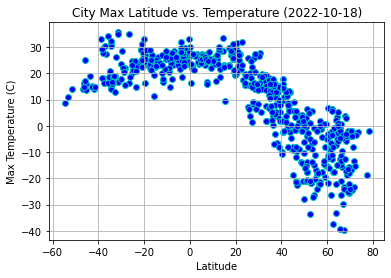

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="c",
            facecolors="blue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

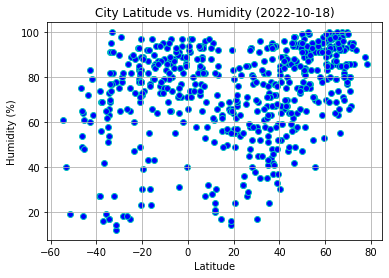

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="c",
            facecolors="blue")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

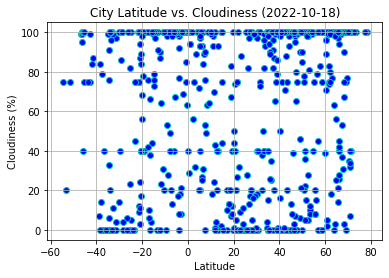

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="c",
            facecolors="blue")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

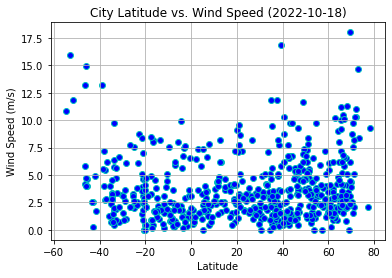

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="c",
            facecolors="blue")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values_temp = city_data_df["Max Temp"]
y_values_hum = city_data_df["Humidity"]
y_values_cloud = city_data_df["Cloudiness"]
y_values_wind = city_data_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values_temp)
regress_values = x_values * slope + intercept
line_eq = "temperature = " + str(round(slope,2)) + " latitude + " + str(round(intercept,2))
print(line_eq)
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values, y_values_hum)
regress_values1 = x_values * slope1 + intercept1
line_eq1 = "humidity = " + str(round(slope1,2)) + " latitude + " + str(round(intercept1,2))
print(line_eq1)
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_values, y_values_cloud)
regress_values2 = x_values * slope2 + intercept2
line_eq2 = "cloudiness = " + str(round(slope2,2)) + " latitude + " + str(round(intercept2,2))
print(line_eq2)
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_values, y_values_wind)
regress_values3 = x_values * slope3 + intercept3
line_eq3 = "Wind Speed = " + str(round(slope3,2)) + " latitude + " + str(round(intercept3,2))
print(line_eq3)

temperature = -0.37 latitude + 18.21
humidity = 0.17 latitude + 70.07
cloudiness = 0.12 latitude + 59.25
Wind Speed = 0.01 latitude + 3.51


In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>= 0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ewa beach,21.3156,-158.0072,26.97,67,75,5.14,US,1670100376
4,motegi,36.5167,140.1833,0.48,78,35,1.41,JP,1670100377
5,kodiak,57.7900,-152.4072,-4.27,80,0,2.06,US,1670100378
10,cherskiy,68.7500,161.3000,-18.83,85,100,2.16,RU,1670100381
13,saint-augustin,51.2260,-58.6502,0.68,84,100,8.34,CA,1670100382


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]< 0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-joseph,-21.3667,55.6167,24.21,83,9,3.94,RE,1670100375
1,port elizabeth,-33.9180,25.5701,17.83,91,100,1.79,ZA,1670100376
3,coihueco,-36.6167,-71.8333,27.41,42,40,6.17,CL,1670100335
6,vaini,-21.2000,-175.2000,29.09,84,75,3.09,TO,1670100379
7,port macquarie,-31.4333,152.9167,16.61,78,97,0.74,AU,1670100379


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8331732489460133


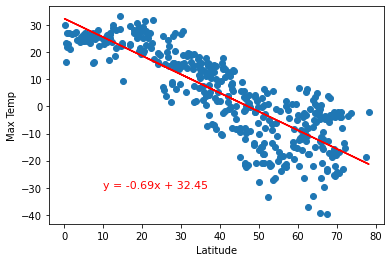

In [57]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.4557563331455534


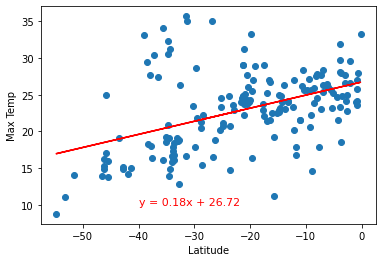

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

### Discussion about the linear relationship between Latitude and Temperature:
1. In the northern hemisphere, there is a negative relationship between latitude and temperature i.e as the latitude in the area reduces, the temperature rises. The r-value of -0.83 shows a strong negative correlation between the two variables.
2. However, the southern hemisphere shows a positive relationship between latitude and temperature i.e as the latitude in the area reduces, the temperature drops down. The r-value of 0.46 shows a moderately positive correlation between the two variables

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3687914572370962


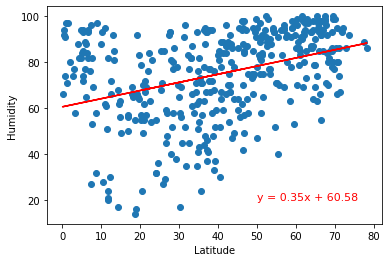

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.3939210450757039


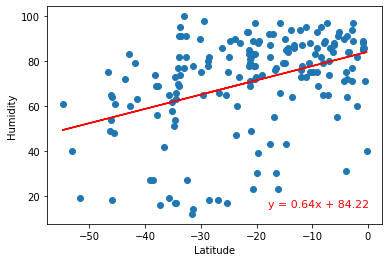

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18,15),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

# Discussion about the linear relationship between Latitude and Humidity:
In both the northern hemisphere and the southern hemisphere, there is a slight positive relationship between latitude and humidity i.e as the latitude in the area rises, the humidity increases. The r-value of 0.39 and 0.37 shows a weak positive correlation between the two variables in both areas. This shows that there is a relationship but there are other factors affecting the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18129293989160997


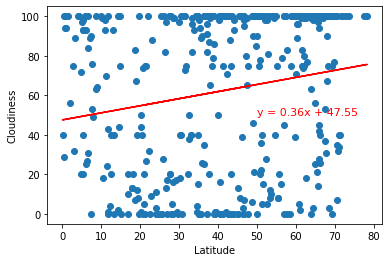

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.1364355020219791


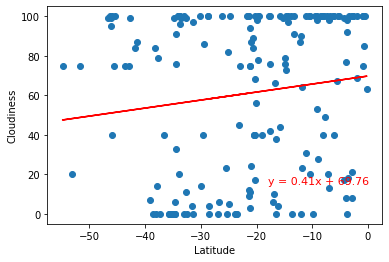

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18,15),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

### Discussion about the linear relationship between Latitude and Cloudiness:
The scatter plots for both the northern and southern hemisphere does not show any clear relationship between latitude and cloudiness. The r-value of 0.18 and 0.14 shows a very weak positive correlation between the two variables in both areas (close to no correlation in the southern hemisphere). This shows that there are other factors affecting the cloudiness in both areas.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.21206745712391667


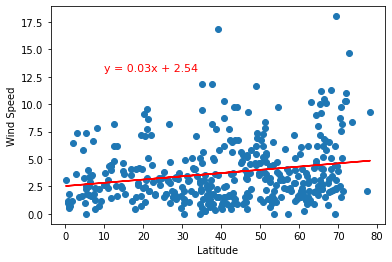

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,13),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.3266934042483251


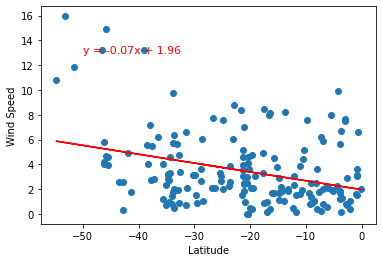

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,13),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

### Discussion about the linear relationship between Latitude and Wind Speed:
1. The northern hemisphere scatter plot shows a slight positive relationship between latitude and wind speed i.e as the latitude in the area reduces, the wind speed reduces as well. The r-value of 0.21 shows a weak positive correlation between the two variables.
2. The southern hemisphere plot shows a somewhat negative relationship between latitude and wind speed i.e as the latitude in the area reduces, the wind speed increases. The r-value of -0.33 shows a weak negative correlation between the two variables